## Load data and split

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('data-biased.csv', ',')
df.drop('id', axis=1, inplace=True)
df.drop('ALUNO', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df['EVASAO']
X = df.drop('EVASAO', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train prejudiced DT model

In [2]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

## Evaluate DT model

Accuracy:  1.0


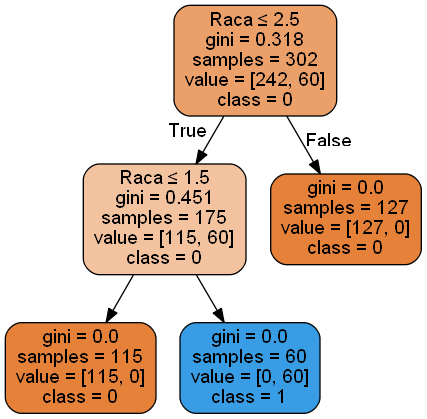

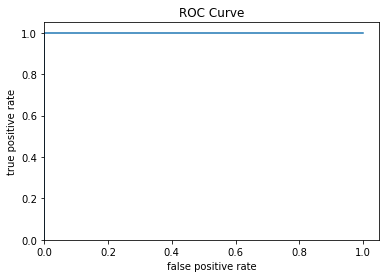

In [3]:
from sklearn import metrics
y_pred = tree_model.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = tree_model.predict_proba(X_test)
false_positive, true_positive, threshold = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(false_positive, true_positive)

from matplotlib import pyplot as plt
plt.plot(false_positive, true_positive)
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = X.columns
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

## Save model

In [4]:
import joblib
filename = 'dt.sav'
joblib.dump(tree_model, filename)
print('saved')

saved
